<h3 id='project-title'>Apply Genetic Algorithm to Find The Better Hyperparameters on LSTM Model</h3>

In this project I will train LSTM model on AAPL stock price dataset, and apply Genetic Algorithm (GA) to find the better hyperparameters of a model. 

The task I would like to solve is stock price prediction. However, I need to predict a specific number of a stock price, it belongs to a prediction problem, I will apply a deep learning model to predict numbers on the previous price of a stock, the previous prices with specific days are features, the price I have to predict is label, hence the learning type is supervised learning!

🎁 Let me introduce what methods I will use!

<h4 id='experimental-design'>How do I complete the project ?</h4>

In this project I will follow the following steps to complete my project: 

1) [**Problem definition**](#problem-definition): Define what am I trying to solve.

2) [**Data and Features**](#data-and-features): What data do I have? What features and labels should I model?

3) [**Evaluation**](#evaluation): What defines success? What metrics do I use?

4) [**Modeling**](#modeling): What kind of model should I use? why?

5)  [**Experiments**](#experiments): What experiments or methods I will try? What else can I try?

🎉 Above the framework is based on [A 6 Step Framework for Approaching Machine Learning Projects](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-1-getting-ready-for-machine-learning/a-6-step-framework-for-approaching-machine-learning-projects.md) by [Daniel Bourke](https://github.com/mrdbourke), an engineer and writer online.

<h4 id='problem-definition'>Problem Definition</h4>

First, input of the data is previous price, output is stock price, and the function is LSTM model. Second, the process of training a deep learning model is mainly a optimization problem, that it to say, during the training process, I would like to find a set of hyperparameters to let the predictions of stock by model be close to real price. However, there are many ways to search the best hyperparameters, the common one is using GridSearchCV from sci-kit learn library, I think whether I can apply a evolution algorithms such as Genetic Algorithm, named as GA, on model to figure out the problem? That's the problem I would like to find out in this project.

<h4 id='data-and-features'>Data and Features</h4>

The dataset used in this project is a time-series data from from kaggle dataset: [NASDAQ-100 Stock Price Dataset](https://www.kaggle.com/datasets/kalilurrahman/nasdaq100-stock-price-data/data?authuser=0), this dataset contains stock prices of all NASDAQ-100 index stocks (as on Sep 2021) from 2010, I only choose AAPL index to predict.

<u>What type is the dataset</u>

This dataset belongs to **structured data**, a table contains rows and columns, an Excel spreadsheet of stock index. All th columns are numerical, and NASDAQ dataset provides **271680** data points for prediction..

Column information:	

| Columns   | Description                        |
| :-------- | :--------------------------------- |
| Open      | Opening Price on that day          |
| High      | High Price on that day             |
| Low       | Low Price on that day              |
| Close     | Closing Price on that day          |
| Adj Close | Adjusted Closing Price on that day |
| Volume    | Volume Traded on that day          |
| Name      | Stock Name (contains 100 stocks)   |

<u>What features is the dataset</u>

<p align='left'>
  <img alt="feature-and-labels" src="https://github.com/Leohoji/deep-learning-hyperparameter-tuning-projects/blob/main/introduction_images/features-for-time-series.png?raw=true" width=800 height=200>
</p>

All the features of this project are numeric features, and I will preprocess them before passing into the model, what methods do I use is also a part of my experiment. At present, most people's guess is that the stock price will be related to the previous day or previous data, hence, the previous data is feature, the current day is label. Therefore, I want to use recursive neural networks such as LSTM to analyze the relationship between the current data and historical data.

During training I set the `N` days for being features as another factors I would like to find out.

<h4 id='evaluation'>Evaluation</h4>

Because the problem belongs to a prediction problem with numerical data, I use common metrics named **Mean Square Error (MSE)** to be the model's loss functions for model evaluation, my purpose is minimizing the loss value as possible as I can.

Formula of loss functions:

$\text{MSE: } \frac{1}{N}\Sigma_{i=1}^{N}(y_{i} - {\hat{y}})^{2}$

<h4 id='modeling'>Modeling</h4>

<p align='left'>
  <img alt="LSTM" src="https://www.mdpi.com/water/water-11-01387/article_deploy/html/images/water-11-01387-g004.png" width=550 height=461>
</p>

Photo credit: [Application of Long Short-Term Memory (LSTM) Neural Network for Flood Forecasting](https://www.mdpi.com/2073-4441/11/7/1387)

In this project I will apply LSTM model on AAPL data, LSTM neural network has the ability to learn time series related data, which requires long-term dependence and memory ability on information. The core thinking is past information may affect future predictions, such as stock prices or sales data, etc.

A more detail information about LSTM:
1. [Understanding LSTM and its diagrams](https://blog.mlreview.com/understanding-lstm-and-its-diagrams-37e2f46f1714)

2. [What are LSTM Networks](https://www.javatpoint.com/what-are-lstm-networks)

<h4 id='experiments'>Experiments</h4>

Before training the model, I need to preprocess my dataset, following is my process of data preprocessing:

1. Read and check the data, I will visualize the AAPL stock price.

2. Rescale the data into range [0, 1] by min-max rescaling using scikit-learn library [API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

3. Create feature and label from data, as present in [Data and Features](#data-and-features), the feature of the time series data is previous `N` day timestamp and the label is `N+1` day timestamp, that is to day, the task of this step is to convert a time series data into a `supervised learning`.

4. Split the dataset into `X` and `y`. Moreover, create the training and testing data ( `X_train`, `X_test`, `y_train`, `y_test` ).


Then, I can go to the next part: training the baseline model and find the better hyperparameters letting model perform better than baseline model, the steps of experiment are following:

1. Create a LSTM model using [tf.keras.layers.LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) and train a baseline model to provide a target value for further hyperparameter searching. The training condition is written here --> [baseline model](#baseline-model). The focus of this project is not to design the model structure but to apply the specific algorithm for hyperparameter searching.

2. Apply the genetic algorithm (GA) to search the better `Epochs` and `N` days (present as `look_back` in this project), the introduction of GA is here --> [GA](#genetic-algorithm).

### Import necessary modules

In [1]:
# data processing
import os
import numpy as np
import pandas as pd
from tensorflow.random import set_seed as tf_set_seed

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# helper functions
from utils.helper_functions  import unzip_file, load_data
from utils.helper_functions  import plot_result, plot_loss_lr, evaluate_model
from utils.helper_functions import save_results, load_results
from utils.genetic_algoritm import GeneticAlgorithm


# path for loading and saving
data_dir = 'datasets'
model_save_to = 'results'
print(f"Root directory: {os.getcwd()}")

Root directory: c:\Users\User\Desktop\tf_hyperparameters_searching\lstm-price-preds-genetic-algorithm


### Be one with data

In [2]:
zip_name = 'NASDAQ100_Stock_Price_Data.zip'
zip_fname = os.path.join(data_dir, zip_name)
unzip_file(zip_fname)

Extract zip file completely from datasets\NASDAQ100_Stock_Price_Data.zip.


In [3]:
read_data = lambda csv_file: pd.read_csv(csv_file, sep='\t', index_col='Date', parse_dates=True)

stock_df = read_data('NASDAQ_100_Data_From_2010.csv')

stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,AAPL


In [4]:
stock_df.tail()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2021-09-03,295.325012,301.804993,292.029999,298.290009,298.290009,6127900,ZM
2021-09-07,298.295013,300.980011,294.799988,299.959991,299.959991,4251900,ZM
2021-09-08,299.549988,299.959991,290.529999,293.600006,293.600006,3934400,ZM
2021-09-09,292.160004,297.570007,291.130005,295.859985,295.859985,3350100,ZM
2021-09-10,296.910004,306.263000,296.809998,301.500000,301.500000,6089600,ZM


In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 271680 entries, 2010-01-04 to 2021-09-10
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open       271680 non-null  float64
 1   High       271680 non-null  float64
 2   Low        271680 non-null  float64
 3   Close      271680 non-null  float64
 4   Adj Close  271680 non-null  float64
 5   Volume     271680 non-null  int64  
 6   Name       271680 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 16.6+ MB


In [6]:
stock_df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64

In [7]:
stock_names = np.unique(stock_df.Name)

stock_names

array(['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'AMAT', 'AMD',
       'AMGN', 'AMZN', 'ANSS', 'ASML', 'ATVI', 'AVGO', 'BIDU', 'BIIB',
       'BKNG', 'CDNS', 'CDW', 'CERN', 'CHKP', 'CHTR', 'CMCSA', 'COST',
       'CPRT', 'CRWD', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'DLTR', 'DOCU',
       'DXCM', 'EA', 'EBAY', 'EXC', 'FAST', 'FB', 'FISV', 'FOX', 'FOXA',
       'GILD', 'GOOG', 'GOOGL', 'HON', 'IDXX', 'ILMN', 'INCY', 'INTC',
       'INTU', 'ISRG', 'JD', 'KDP', 'KHC', 'KLAC', 'LRCX', 'LULU', 'MAR',
       'MCHP', 'MDLZ', 'MELI', 'MNST', 'MRNA', 'MRVL', 'MSFT', 'MTCH',
       'MU', 'NFLX', 'NTES', 'NVDA', 'NXPI', 'OKTA', 'ORLY', 'PAYX',
       'PCAR', 'PDD', 'PEP', 'PTON', 'PYPL', 'QCOM', 'REGN', 'ROST',
       'SBUX', 'SGEN', 'SIRI', 'SNPS', 'SPLK', 'SWKS', 'TCOM', 'TEAM',
       'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRSN', 'VRTX', 'WBA', 'WDAY',
       'XEL', 'XLNX', 'ZM'], dtype=object)

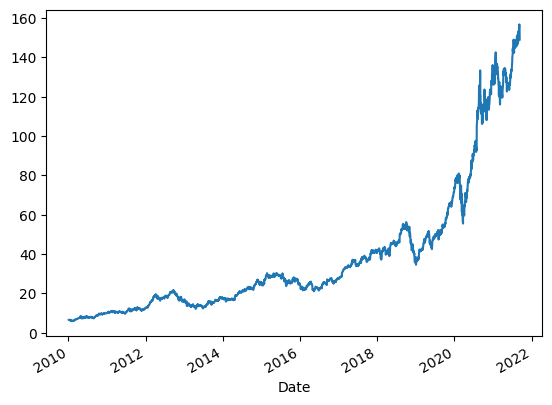

In [8]:
# Show price
AAPL_df = stock_df[stock_df.Name == 'AAPL']
AAPL_df.loc[:, 'Adj Close'].plot.line();

<h3 id='genetic-algorithm'>Genetic Algorithm for hyperparameter searching</h3>

**What Is Genetic Algorithm (GA)**

Genetic Algorithm (GA) is a algorithm that is mainly cope with search and optimization problem in machine learning. This technique is based on the principles of **Genetics and Natural Selection** from a biologist **Darwin**. Hence, GA is an "evolutionary algorithm", which has a pool or a population of possible solutions to the given problem, and algorithm will undergo fitness assignment, reproduction containing selection, gene crossover, and gene mutation, and natural selection iteratively to "evolve" better individuals or solutions over generation.

There are some advantages and disadvantages of GA:

<u>Advantages of GA</u>

1. It is faster as compared to traditional methods.

2. It does not require any derivative information compared to other optimization method such as gradient descent.

3. It has a better parallel capabilities.

4. It is useful when the search space is very large, hence, it can be applied on many complex problems.

<u>Disadvantages of GA</u>

1. If the derivative information is available the method is not suitable.

2. Computationally expensive.

3. If the parameters of GA implemented improperly, it will not converge to optimal solution.



Here is the process of GA in this project:

<p align='left'>
  <img alt="process-of-GA" src="https://github.com/Leohoji/deep-learning-hyperparameter-tuning-projects/blob/main/introduction_images/process_of_GA_experiment.png?raw=true" width=800 height=500>
</p>


In this project I use genetic algorithm to find better `epoch` and `look_back` hyperparameters, here is my component of algorithm:

**Genotype representation**

I use `Binary Representation` to represent each population (or chromosomes) of GA.

For instance:

```python
[[28, 19], [34, 10], [50, 18], [55, 6], [99, 40]]
```
will be converted to 

```python
[['11100', '10011'], ['100010', '1010'], ['110010', '10010'], ['110111', '110'], ['1100011', '101000']]
```

**Population Initialization**

The `initial_chromosomes` of GA contains 10 `[epochs, look_back]` group to combine a population with randomly generation.

**Fitness Function**

The fitness function is **Mean Square Error (MSE)**, as well as the loss function used in LSTM model for evaluation.

First I will train a baseline model for termination metric of GA, and try different selection methods to run the GA for better model searching. The `evaluate_model` function can fit the data and output the MSE value for further steps such as selection, crossover, etc. If the fitness value is better the metric from baseline model, the algorithm will go termination.

ExperimentaL conditions:

| Hyperparameters     | Values        |
| :-----------------: | :-----------: |
| Rescaling method    | MinMaxScaling |
| Loss function       | mse           |
| Optimizer           | Adam          |
| Learning rates      | 1e-4          |
| Batch size          | 32            |
| Epochs              | `??`          |
| Look backs          | `??`          |

I also apply callbacks during training such as [ReduceLROnPlateau](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau) and [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) to prevent the value of epoch is too large.

**Selection, Crossover, and Mutation**

I choose three type of selection in GA:

1. **Rank Selection**: Choose the top 50% to be offsprings and turn into crossover and mutation steps.

2. **Roulette Wheel Selection**: Assign the cumulative probability for each fitness individual based on the value, The smaller the value, the greater the probability of being selected, and turn into crossover and mutation steps.

3. **Tournament Selection**: Randomly choose 2 individual to compete, the smaller fitness will be selected, and turn into crossover and mutation steps.

- The range of crossover rate is [0.5, 1.].

- The mutation rate is fixed to 0.1

**Survivor Selection**

- If the value of offspring is zero or bigger than max value, it will be rejected to the next generation.

- If the length of the offspring is less than three, new population will be generated and join it.

**Termination Condition**

1. Max iteration is set as 100.

2. Fitness value is better than baseline model.


If termination triggered, the information of model, predictions, true labels, epochs, and look back (window) will be recorded and displayed, better model will save at `model_save_to` file path.

<h4 id='baseline-model'> Baseline model </h4>

ExperimentaL conditions:

| Hyperparameters     | Values        |
| :-----------------: | :-----------: |
| Rescaling method    | MinMaxScaling |
| Loss function       | mse           |
| Optimizer           | Adam          |
| Learning rates      | 1e-4          |
| Batch size          | 32            |
| Epochs              | 30            |
| Look backs          | 10            |

I also use [ReduceLROnPlateau](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau) API for learning rate reduction gradually during training.

In [9]:
# Set random seed
seed = 42
np.random.seed(seed)
tf_set_seed(seed)

# Prepare dataset
dataset = load_data('NASDAQ_100_Data_From_2010.csv', stock_code='AAPL')
test_dates, test_dataset = load_data('AAPL_test_data.csv', stock_code=None, test_data=True)

# Fix specific parameters
epochs = 30
look_back = 10 # look previous n-day data

# Record training info
model_results = evaluate_model(dataset, test_dataset, epochs, look_back)

Epoch 1/30
91/91 [==============================] - 8s 25ms/step - loss: 0.0738 - val_loss: 0.6874
Epoch 2/30
91/91 [==============================] - 1s 12ms/step - loss: 0.0442 - val_loss: 0.4058
Epoch 3/30
91/91 [==============================] - 1s 15ms/step - loss: 0.0263 - val_loss: 0.1663
Epoch 4/30
91/91 [==============================] - 1s 13ms/step - loss: 0.0129 - val_loss: 0.0370
Epoch 5/30
91/91 [==============================] - 1s 14ms/step - loss: 0.0079 - val_loss: 0.0130
Epoch 6/30
91/91 [==============================] - 1s 11ms/step - loss: 0.0074 - val_loss: 0.0113
Epoch 7/30
91/91 [==============================] - 1s 11ms/step - loss: 0.0071 - val_loss: 0.0193
Epoch 8/30
91/91 [==============================] - 1s 11ms/step - loss: 0.0063 - val_loss: 0.0093
Epoch 9/30
91/91 [==============================] - 1s 10ms/step - loss: 0.0058 - val_loss: 0.0111
Epoch 10/30
91/91 [==============================] - 1s 10ms/step - loss: 0.0062 - val_loss: 0.0112
Epoch 11/

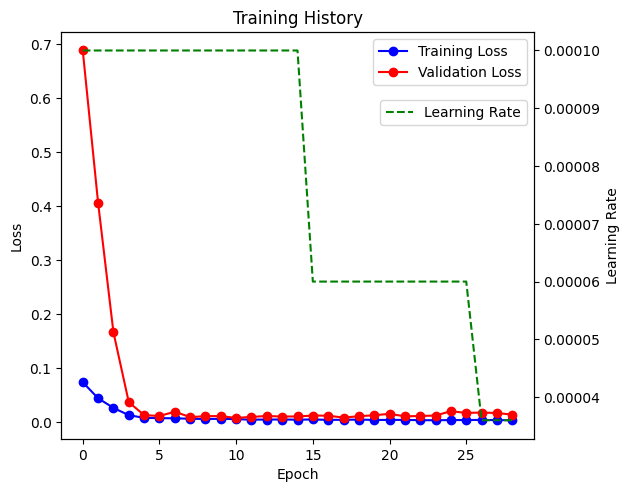

In [10]:
plot_loss_lr(model_results['History'])

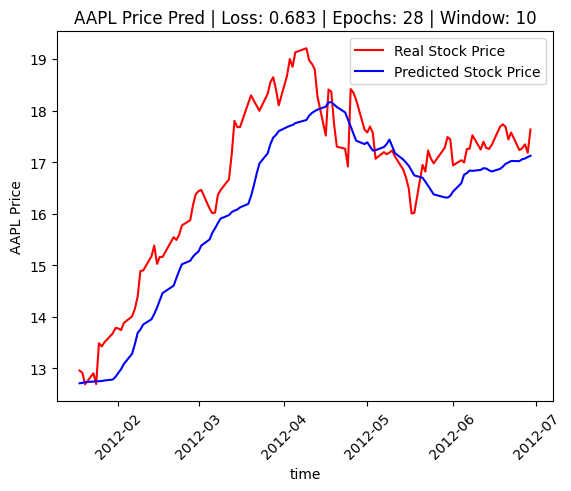

In [11]:
# Save results
model_result_filepath = os.path.join(model_save_to, "experiments_results.pickle")
save_results(model_results, model_result_filepath)
results = load_results(model_result_filepath)

# MSE loss results
baseline_loss = results['Evaluation']
baseline_pred = results['Predictions']
baseline_epochs = results['Epochs']
baseline_window = results['Window']
baseline_y_true = results['True_Labels']
mse_title = 'AAPL Price Pred | Loss: %s | Epochs: %s | Window: %s' % (baseline_loss, baseline_epochs, baseline_window)
plot_result(baseline_y_true, baseline_pred, mse_title, test_dates[look_back:])

#### Use GA with `Rank Selection` to search hyperparameter 

Target value to beat: 0.17075
========================================  Generation 1 ========================================
[Epochs, Look_Back]: [[52, 33], [93, 45], [15, 49], [72, 33], [61, 12], [21, 31], [83, 11], [87, 33], [75, 53], [75, 39]]
Training start: Epoch: 52, Look Back: 33
Epoch 1/52
90/90 [==============================] - 5s 18ms/step - loss: 0.0741 - val_loss: 0.6458
Epoch 2/52
90/90 [==============================] - 1s 9ms/step - loss: 0.0398 - val_loss: 0.3124
Epoch 3/52
90/90 [==============================] - 1s 10ms/step - loss: 0.0189 - val_loss: 0.1009
Epoch 4/52
90/90 [==============================] - 1s 9ms/step - loss: 0.0107 - val_loss: 0.0393
Epoch 5/52
90/90 [==============================] - 1s 9ms/step - loss: 0.0084 - val_loss: 0.0371
Epoch 6/52
90/90 [==============================] - 1s 9ms/step - loss: 0.0078 - val_loss: 0.0210
Epoch 7/52
90/90 [==============================] - 1s 9ms/step - loss: 0.0066 - val_loss: 0.0150
Epoch 8/52
90/90 [=====

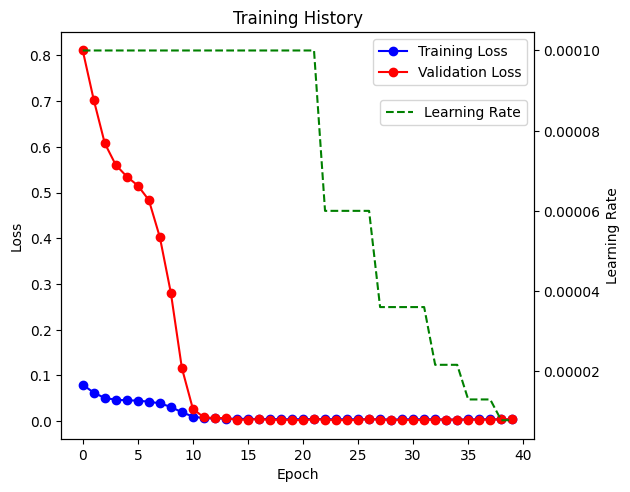

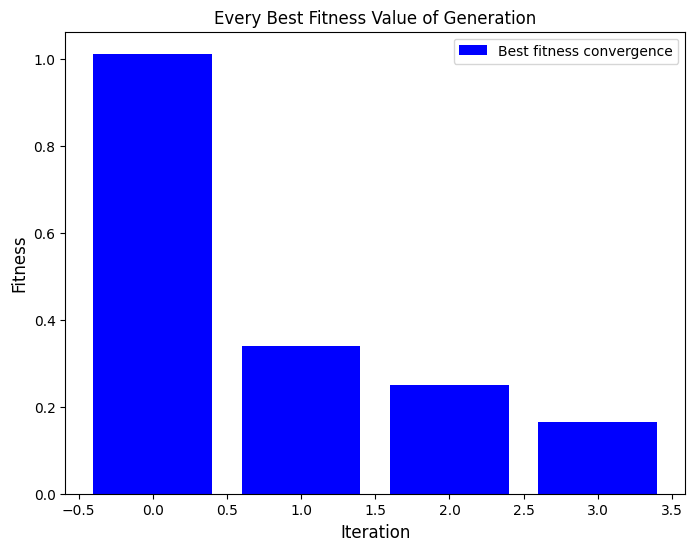

Saving the best model at results\LSTM_GA_model_Rank_g4_cur8_06302024_141458.h5


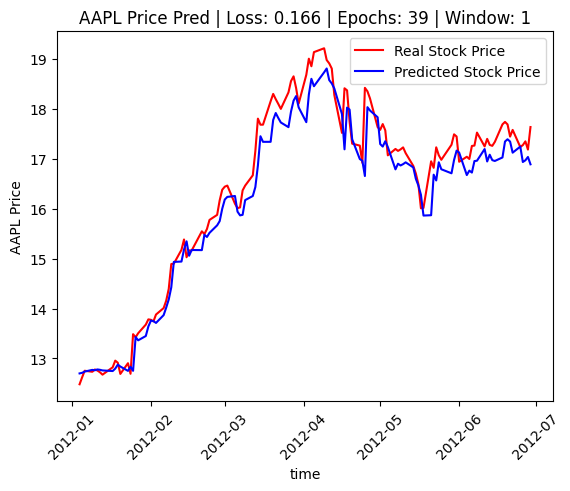

In [12]:
# Set random seed
seed = 42
np.random.seed(seed)
tf_set_seed(seed)

# Load dataset
dataset = load_data('NASDAQ_100_Data_From_2010.csv', 'AAPL')
test_dates, test_dataset = load_data('AAPL_test_data.csv', stock_code=None, test_data=True)

# Run genetic algorithm
genetic_algorithm = GeneticAlgorithm(target_eval=results['Evaluation'] * 0.25, 
                                     epoch_range=[1, 101],
                                     look_back_range=[10, 61],
                                     size=(1, 10),
                                     max_iter=100, 
                                     crossover_rate=0.8,
                                     mutation_rate=0.1,
                                     selection_method='Rank',
                                     model_save_to=model_save_to,)
final_results = genetic_algorithm.run(dataset=dataset, test_dataset=test_dataset)

# Plot the figure of results
y_true, better_pred = final_results['True_Labels'], final_results['Predictions']
better_epochs, better_window = final_results['Epochs_Look']
better_loss = np.round(final_results['Loss_Value'], 3)

title = 'AAPL Price Pred | Loss: %s | Epochs: %s | Window: %s' % (better_loss, better_epochs, better_window)
plot_result(y_true, better_pred, title, test_dates[better_window:])

#### Use GA with `Roulette Wheel Selection` to search hyperparameter

Target value to beat: 0.17075
========================================  Generation 1 ========================================
[Epochs, Look_Back]: [[52, 33], [93, 45], [15, 49], [72, 33], [61, 12], [21, 31], [83, 11], [87, 33], [75, 53], [75, 39]]
Training start: Epoch: 52, Look Back: 33
Epoch 1/52
90/90 [==============================] - 4s 17ms/step - loss: 0.0741 - val_loss: 0.6458
Epoch 2/52
90/90 [==============================] - 1s 8ms/step - loss: 0.0398 - val_loss: 0.3124
Epoch 3/52
90/90 [==============================] - 1s 8ms/step - loss: 0.0189 - val_loss: 0.1009
Epoch 4/52
90/90 [==============================] - 1s 8ms/step - loss: 0.0107 - val_loss: 0.0393
Epoch 5/52
90/90 [==============================] - 1s 8ms/step - loss: 0.0084 - val_loss: 0.0371
Epoch 6/52
90/90 [==============================] - 1s 9ms/step - loss: 0.0078 - val_loss: 0.0210
Epoch 7/52
90/90 [==============================] - 1s 9ms/step - loss: 0.0066 - val_loss: 0.0150
Epoch 8/52
90/90 [======

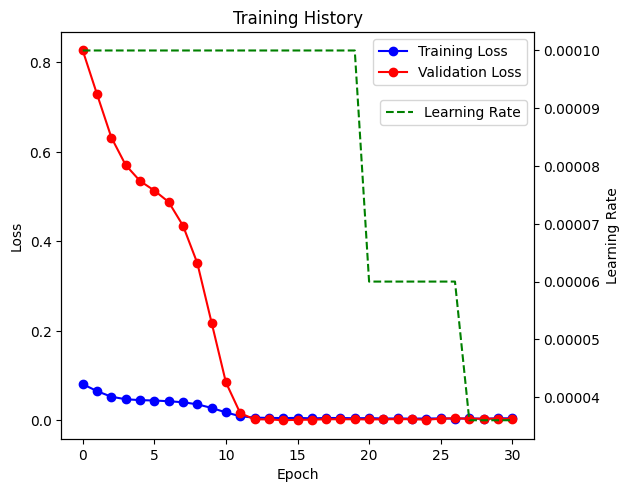

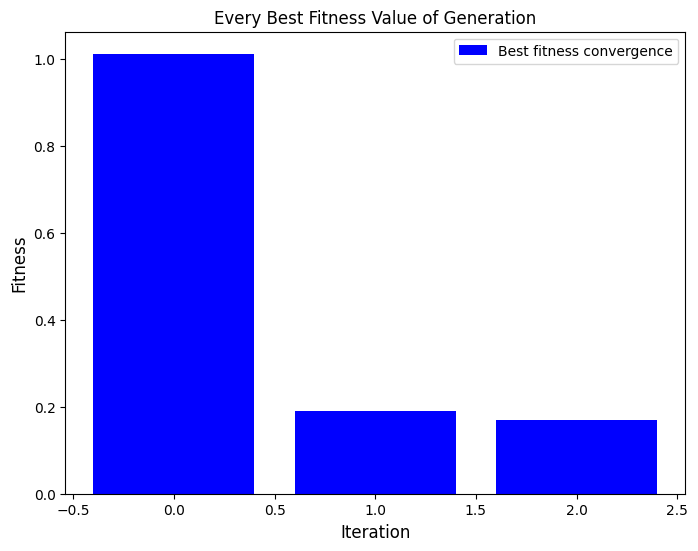

Saving the best model at results\LSTM_GA_model_Roulette_g3_cur10_06302024_143420.h5


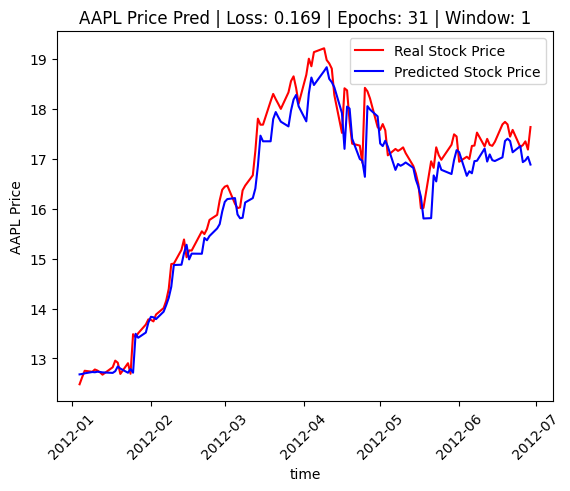

In [14]:
# Run genetic algorithm with roulette wheel selection
seed = 42
np.random.seed(seed)
tf_set_seed(seed)
selection_method = 'Roulette'

# Run genetic algorithm
genetic_algorithm = GeneticAlgorithm(target_eval=results['Evaluation'] * 0.25, 
                                     epoch_range=[1, 101],
                                     look_back_range=[10, 61],
                                     size=(1, 10),
                                     max_iter=100, 
                                     crossover_rate=0.8,
                                     mutation_rate=0.1,
                                     selection_method=selection_method,
                                     model_save_to=model_save_to,)
final_results = genetic_algorithm.run(dataset=dataset, test_dataset=test_dataset)

# Plot the figure of results
y_true, better_pred = final_results['True_Labels'], final_results['Predictions']
better_epochs, better_window = final_results['Epochs_Look']
better_loss = np.round(final_results['Loss_Value'], 3)

title = 'AAPL Price Pred | Loss: %s | Epochs: %s | Window: %s' % (better_loss, better_epochs, better_window)
plot_result(y_true, better_pred, title, test_dates[better_window:])

#### Use GA with `Tournament Selection` to search hyperparameter

Target value to beat: 0.17075
========================================  Generation 1 ========================================
[Epochs, Look_Back]: [[52, 33], [93, 45], [15, 49], [72, 33], [61, 12], [21, 31], [83, 11], [87, 33], [75, 53], [75, 39]]
Training start: Epoch: 52, Look Back: 33
Epoch 1/52
90/90 [==============================] - 5s 20ms/step - loss: 0.0741 - val_loss: 0.6458
Epoch 2/52
90/90 [==============================] - 1s 9ms/step - loss: 0.0398 - val_loss: 0.3124
Epoch 3/52
90/90 [==============================] - 1s 9ms/step - loss: 0.0189 - val_loss: 0.1009
Epoch 4/52
90/90 [==============================] - 1s 11ms/step - loss: 0.0107 - val_loss: 0.0393
Epoch 5/52
90/90 [==============================] - 1s 10ms/step - loss: 0.0084 - val_loss: 0.0371
Epoch 6/52
90/90 [==============================] - 1s 11ms/step - loss: 0.0078 - val_loss: 0.0210
Epoch 7/52
90/90 [==============================] - 1s 11ms/step - loss: 0.0066 - val_loss: 0.0150
Epoch 8/52
90/90 [==

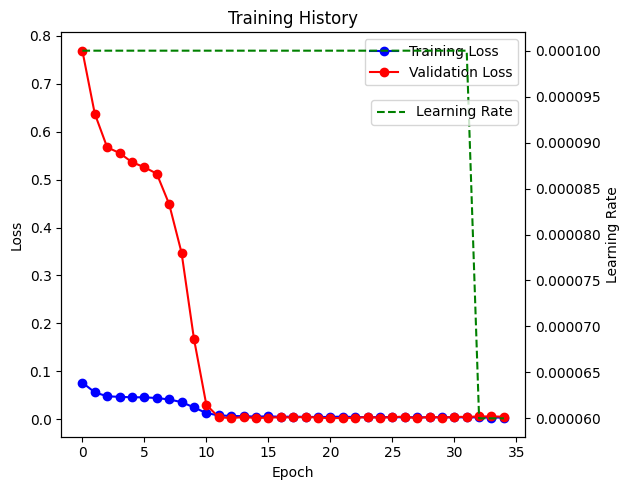

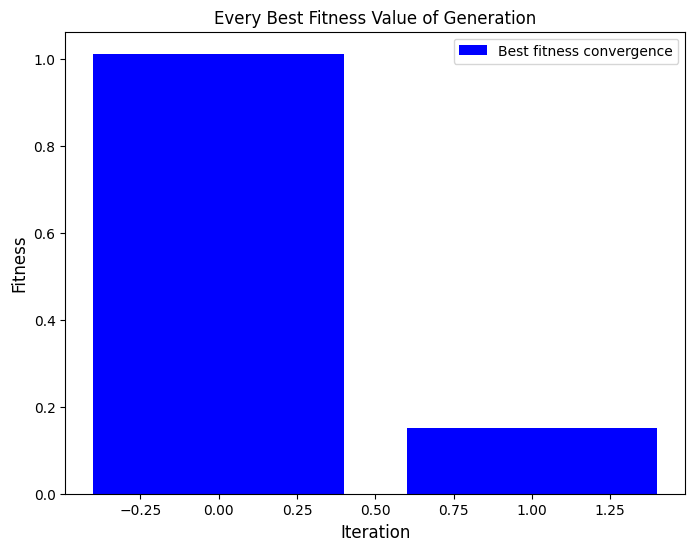

Saving the best model at results\LSTM_GA_model_Tournament_g2_cur1_06302024_144313.h5


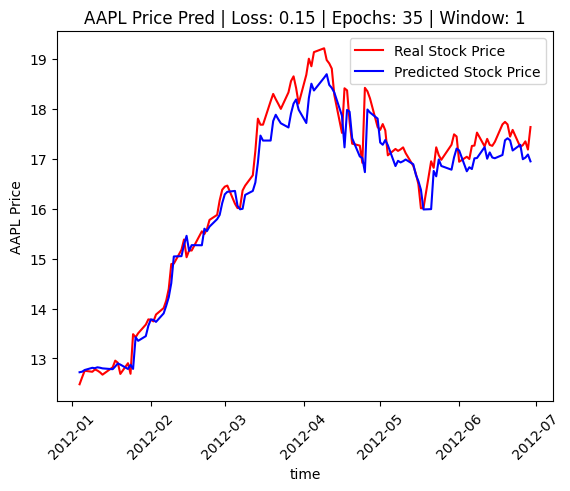

In [15]:
# Run genetic algorithm with tournament selection
seed = 42
np.random.seed(seed)
tf_set_seed(seed)
selection_method = 'Tournament'

# Run genetic algorithm
genetic_algorithm = GeneticAlgorithm(target_eval=results['Evaluation'] * 0.25, 
                                     epoch_range=[1, 101],
                                     look_back_range=[10, 61],
                                     size=(1, 10),
                                     max_iter=100, 
                                     crossover_rate=0.8,
                                     mutation_rate=0.1,
                                     selection_method=selection_method,
                                     model_save_to=model_save_to,)
final_results = genetic_algorithm.run(dataset=dataset, test_dataset=test_dataset)

# Plot the figure of results
y_true, better_pred = final_results['True_Labels'], final_results['Predictions']
better_epochs, better_window = final_results['Epochs_Look']
better_loss = np.round(final_results['Loss_Value'], 3)

title = 'AAPL Price Pred | Loss: %s | Epochs: %s | Window: %s' % (better_loss, better_epochs, better_window)
plot_result(y_true, better_pred, title, test_dates[better_window:])

<h3>Conclusion</h3>

All of selection methods can drive the GA to evolve the better hyperparameter searching.

In the further experiments, what I can do for improvement is...

1. Change the range of initial chromosomes, it may provide more diversity.

2. Change the architecture of LSTM model or collect more data for better performance.

3. Change different value of crossover rate and mutation rate to increase the diversity of population to prevent premature of algorithm.

4. Try other stocks.